# Persoalan Papan Catur Rusak

*Permasalahan `Papan Catur Rusak` atau `Defective Chessboard Problem` merupakan persoalan yang menyatakan bahwa jika suatu papan catur rusak dan kehilangan satu buah kotaknya, dapatkah dan bagaimana cara kita menyusun `L-Triomino` pada papan catur tersebut sedemikian rupa sehingga semua kotak pada papan ini bisa tertutupi.*

*Jika pada masa kecil Anda paling tidak pernah memainkan atau mengetahui permainan legendaris `Tetris`, maka istilah Triomino ini tentu tidak asing lagi.`Triomino` merupakan sebutan untuk susunan blok tetris yang memiliki tiga buah kotak, bukan empat. Dalam persoalan ini, akan digunakan L-Triomino dan sesuai dengan namanya, Triomino ini akan memiliki bentuk seperti huruf `L` dan tentunya bisa dirotasi seperti yang sering Anda lihat pada permainan Tetris.*

*Permasalahan ini merupakan permasalahan yang cukup intuitif untuk menjelaskan implementasi algoritma `Divide and Conquer` secara klasik dan visual. Tujuan utama dari implementasi ini adalah untuk membantu memberikan visualisasi dalam memecahkan permasalahan tersebut sehingga penggunanya bisa lebih memahami `nature` dari `Algoritma Divide and Conquer`*

# Pustaka

*Untuk memberikan kecepatan eksekusi dan penggunaan memori yang seminimal mungkin, maka penulis akan menggunakan `Numpy Array` ketimbang `Python List`. Untuk visualisasinya, maka penulis akan menggunakan Seaborn dan Matplotlib, selain juga untuk mendalami dan mengasah kemampuan penulis dalam bidang `Data Science` lebih lanjut mengenai visualisasi data dengan kedua kakas tersebut.*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Inisialisasi Papan Catur

*Representasi paling umum yang sering digunakan dalam `Computer Science` untuk menggambarkan sebuah papan catur adalah dengan menggunakan matriks. Inisialisasi papan catur untuk persoalan ini akan dilakukan dengan matriks nol berukuran $2^{k} \times 2^{k}$ dengan `k` adalah konstanta bernilai positif lebih dari 0.*

In [ ]:
# Easy board initialization with Numpy
def init_board(k):
  return np.zeros((2**k, 2**k), dtype = int)

# Destruksi Acak Satu Kotak Papan Catur

*Sebuah kotak yang dipilih secara acak pada Papan Catur tersebut akan kita rusak sehingga hanya ada $n - 1$ kotak yang bisa dimainkan oleh [Magnus Carlsen](https://magnuscarlsen.com/). Tentunya, kita tidak akan menghilangkan kotak yang tidak beruntung itu dari matriks yang ada, tetapi dengan menggunakan representasi angka yang berbeda untuk membedakan kotak yang valid dan kotak yang rusak. Pendekatan dengan menggunakan representasi `Boolean` juga bisa digunakan untuk melakukan hal ini.*

In [ ]:
# Random the index of the matrix and change the element of it
def destruct(board):
  size = board.shape[0]
  board[np.random.randint(size)][np.random.randint(size)] = -1

# Mendeteksi Letak Kotak Rusak

*Selanjutnya, letak dari kotak rusak tersebut akan dideteksi dan ditentukan di `kuadran` atau bagian kotak sebelah mana kotak tersebut berada. Hal ini akan berguna pada saat pemecahan setiap sub-persoalan yang ada.*

In [ ]:
# tl_row, br_row -> row of top left and bottom right of the a square
# tl_col, br_col -> column of top left and bottom right of a square
def detect_defect(board, tl_row, tl_col, br_row, br_col):
  # Get the index of defective tile
  # Numpy Where to speed up searching, return an array of fulfilling indices
  for i in range (tl_row, br_row + 1):
    temp = board[i][tl_col : br_col + 1]
    if(-1 in temp):
      row_idx = i
      col_idx = np.where(temp == -1)[0][0] + tl_col 
      break
  # Get the quadrant position of the defect
  # Top Quadrant
  if(row_idx <= tl_row + (br_row - tl_row) // 2):
    if(col_idx <= tl_col + (br_col - tl_col) // 2):
      return (0, row_idx, col_idx)     # Top-Left
    else:
      return (1, row_idx, col_idx)     # Top-Right
  # Bottom Quadrant
  else:
    if(col_idx <= tl_col + (br_col - tl_col) // 2):
      return (2, row_idx, col_idx)     # Bottom-Left
    else:
      return (3, row_idx, col_idx)     # Bottom-Right

# Memasang Triomino pada Papan Catur

*Tambahkan `Triomino` pada papan catur. Karena sebelumnya posisi kotak yang rusak sudah diketahui, maka penambahan Triomino ini dapat dilakukan dengan cukup mudah menggunakan hasil `kuadran` yang didapatkan dari deteksi kotak rusak sebelumnya.*

In [ ]:
def add_triomino(board, defect, tl_row, tl_col, br_row, br_col):
  # Increment the current idx variable (for visualization)
  global curr_idx
  # Map each quadrants (imagine a 2x2 board)
  quadrants = {0: (tl_row, tl_col), 1: (tl_row, br_col), 
               2: (br_row, tl_col), 3: (br_row, br_col)}
  curr_idx += 1
  # Set elements of the matrix to the current idx
  for i in range(tl_row, br_row + 1):
    for j in range(tl_col, br_col + 1):
      board[i][j] = curr_idx
  # Set the defect based on the quadrant position
  board[quadrants[defect][0]][quadrants[defect][1]] = -1

# Memvisualisasikan Papan Catur

*Visualisasi dilakukan dengan menggambarkan dua buah `layers`. Layer pertama digunakan untuk membuat layout papan catur tanpa anotasi apapun. Layer kedua akan digunakan untuk memberikan anotasi indeks yang digunakan pada saat dieksekusinya program (menggambarkan tahap pengisian Triomino). Pada visualisasi ini akan dilakukan `masking` untuk kotak yang defektif sehingga bisa dibedakan dengan mudah.*

*Beberapa atribut yang ada di dalam visualisasi tersebut:*
*   *Figsize: diatur sedemikian rupa sehingga ukuran kotak yang dihasilkan adalah ukuran papan.*
*   *Color Bar: diset supaya tidak ada Bar warna Heatmap yang digunakan.*
*   *Square: diset supaya gambar yang dihasilkan bersifat simetris.*
*   *Labels: diset supaya tidak menampilkan label ticks apapun.*
*   *Color Pallete: digunakan Color Pallete Seaborn, yaitu Flare.*

In [ ]:
def visualize(board):
  # Use heatmap to visualize
  # Visualize the board by masking defective tile
  plt.figure(figsize = (board.shape[0], board.shape[1]))
  defective = np.array(board) < 0
  sns.color_palette("flare", as_cmap = True)
  sns.heatmap(board, linewidths = 0.01, linecolor = "white", 
              cbar = False, annot = False, square = True,
              yticklabels = False, xticklabels = False) 
  sns.heatmap(board, linewidths = 0.01, linecolor = "white", cbar = False,
              annot = True, square = True, mask = defective,
              yticklabels = False, xticklabels = False)
  plt.show()

# *Divide and Conquer with Recursive Tiling*

*Bagian ini merupakan bagian algoritma `Divide and Conquer` dari pemecahan persoalan ini. Akan dilakukan `tiling` secara rekursif dengan menggunakan fungsi atau prosedur yang telah dibuat sebelumnya. Pendekatan yang dilakukan adalah sebagai berikut.*

1.   Cari dan temukan posisi dari kotak rusak yang ada di dalam `board` yang dibentuk dari dua pasang indeks baris dan kolom yang menjadi `ukuran` dari papan yang ingin dicari. Dengan demikian, pencarian bisa dilakukan secara rekursif ketika papan catur tersebut dibagi menjadi bagian yang lebih kecil. 
2.   Basis dari algoritma rekursif yang digunakan di sini adalah apabila kita menemukan papan rusak yang ukurannya hanya $2 \times 2$. Dengan demikian, kita tinggal menambahkan sebuah `Triomino` baru sesuai dengan posisi dari kotak rusak yang kita temukan tadi.
3. Jika tidak, karena papan dibagi ke dalam empat bagian yang sama, dan hanya ada satu kotak defektif yang ada pada papan, maka kita harus memberikan perlakuan yang sama kepada papan yang tidak memiliki defektif tersebut. Hal ini dilakukan dengan melakukan penambahan `kotak defektif semu` pada kuadran lain sehingga nantinya di setiap kuadran papan akan memiliki satu kotak rusak.
4. Hal ini akan dilakukan secara rekursif sampai komputasi berhasil sampai ke dalam bagian basis dari rekursi yang kita lakukan.
5. Terakhir, akan ditambahkan sebuah `Triomino` terakhir untuk menutupi `kotak defektif semu` yang kita tambahkan sebelumnya.



In [ ]:
# Map the Quadrants of Square
def make_quadrants(tl_row, tl_col, br_row, br_col):
  quadrants = {0: (tl_row + (br_row - tl_row) // 2, tl_col + (br_col - tl_col) // 2),
               1: (tl_row + (br_row - tl_row) // 2, tl_col + (br_col - tl_col) // 2 + 1),
               2: (tl_row + (br_row - tl_row) // 2 + 1, tl_col + (br_col - tl_col) // 2),
               3: (tl_row + (br_row - tl_row) // 2 + 1, tl_col + (br_col - tl_col) // 2 + 1)
              }
  return quadrants

In [ ]:
# Add Pseudo Defective Squares to None-Existing Quadrants
def add_pseudo_defective(board, quadrants, defect):
  revert = True
  # Check each quadrants
  for idx in quadrants.values():
    row_idx = idx[0]
    col_idx = idx[1]
    # Add a defective if there is none
    if(board[row_idx][col_idx] == 0):
      board[row_idx][col_idx] = -1
    else:
      revert = False
  # Revert the Pseudo Squares back
  if revert:
    board[quadrants[defect][0]][quadrants[defect][1]] = 0

In [ ]:
# Add Last Triomino
def add_last_triomino(board, quadrants, defect):
  global curr_idx
  revert = True
  for idx in quadrants.values():
    row_idx = idx[0]
    col_idx = idx[1]
    if board[row_idx][col_idx] == -1:
      board[row_idx][col_idx] = curr_idx
    else:
      revert = False
  # Add Triomino to the Pseudo Squares
  if revert:
    board[quadrants[defect][0]][quadrants[defect][1]] = -1

In [ ]:
# Divide and Conquer
def dac_tiling(board, tl_row, tl_col, br_row, br_col):
  # Global variable index
  global curr_idx
  # Dictionary of Quadrants of a 2x2 Center Square of a Board
  # Same annotations with before
  quadrants = make_quadrants(tl_row, tl_col, br_row, br_col)
  # Visualize the board in each step
  visualize(board)
  # Find and Detect the defect
  defect, row_idx, col_idx = detect_defect(board, tl_row, tl_col, br_row, br_col)
  # Recursive Basis
  # Found a 2x2 Square Board, Add a Triomino
  if((tl_col == br_col - 1) and (tl_row == br_row - 1)):
    add_triomino(board, defect, tl_row, tl_col, br_row, br_col)
  # Recurrence
  else:
    # Add Pseudo Defective Squares
    add_pseudo_defective(board, quadrants, defect)
    # Split the board and recall the function
    # Top-Left Part
    dac_tiling(board, tl_row, tl_col, tl_row + (br_row - tl_row) // 2, tl_col + (br_col - tl_col) // 2)
    # Top-Right Part
    dac_tiling(board, tl_row, tl_col + (br_col - tl_col) // 2 + 1, tl_row + (br_row - tl_row) // 2, br_col)
    # Bottom-Left Part
    dac_tiling(board, tl_row + (br_row - tl_row) // 2 + 1, tl_col, br_row, tl_col + (br_col - tl_col) // 2)
    # Bottom-Right Part
    dac_tiling(board, tl_row + (br_row - tl_row) // 2 + 1, tl_col + (br_col - tl_col) // 2 + 1, br_row, br_col)
    # Increase the current index and add the last Triomino
    curr_idx += 1
    add_last_triomino(board, quadrants, defect)

# *Callers*

In [ ]:
def solve_defective(board):
  dac_tiling(board, 0, 0, board.shape[0] - 1, board.shape[1] - 1)
  visualize(board)
  return board

# Defective Chessboard Problem

In [ ]:
def main(k):
  board = init_board(k)
  destruct(board)
  board = solve_defective(board)

**$2 \times 2$ Chessboard**

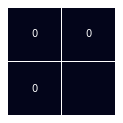

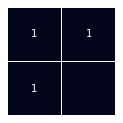

In [ ]:
# Init Current Idx
curr_idx = 0
main(1)

**$4 \times 4$ Chessboard**

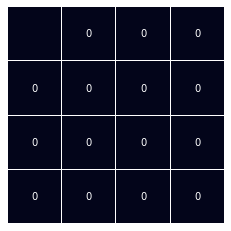

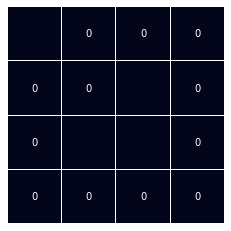

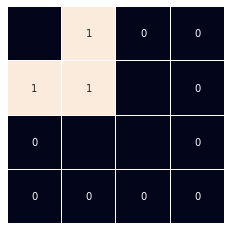

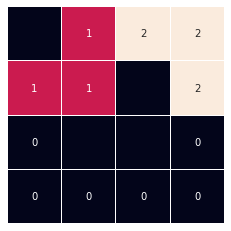

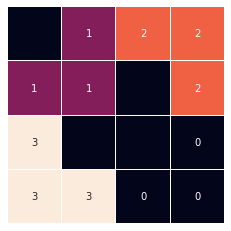

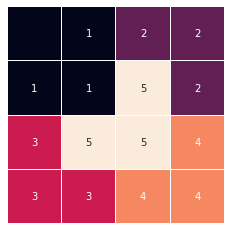

In [ ]:
# Re-init
curr_idx = 0
main(2)

**$8 \times 8$ Chessboard**

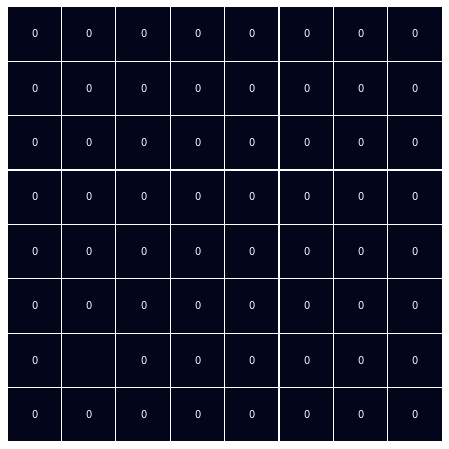

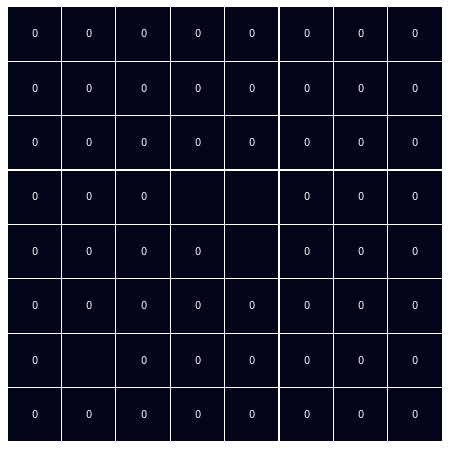

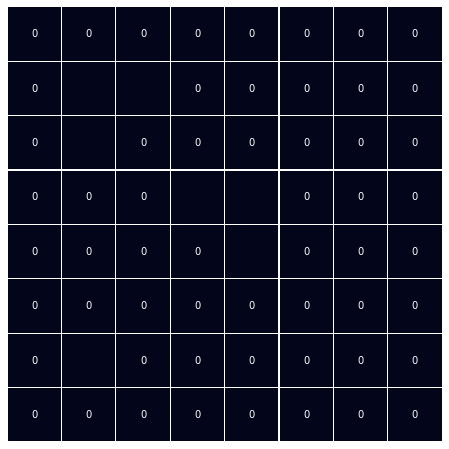

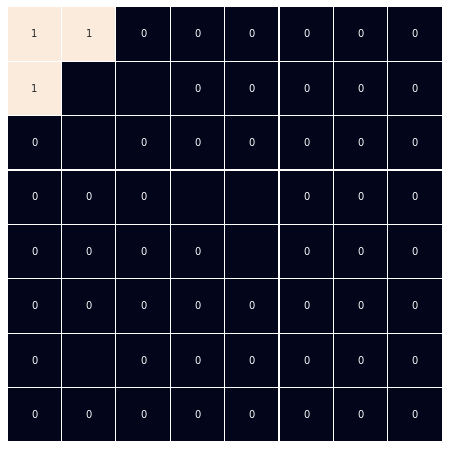

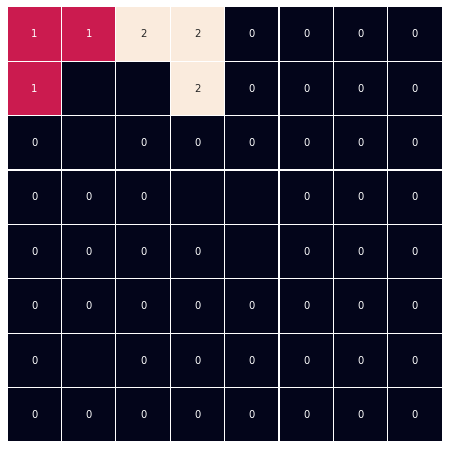

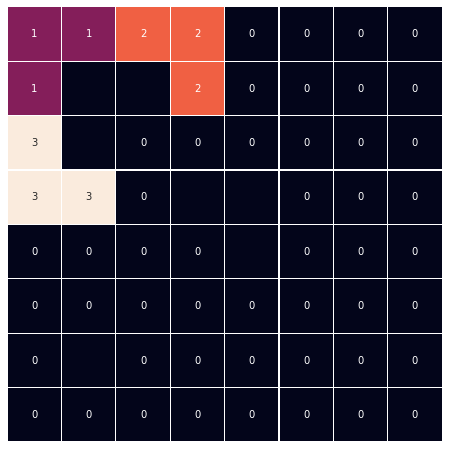

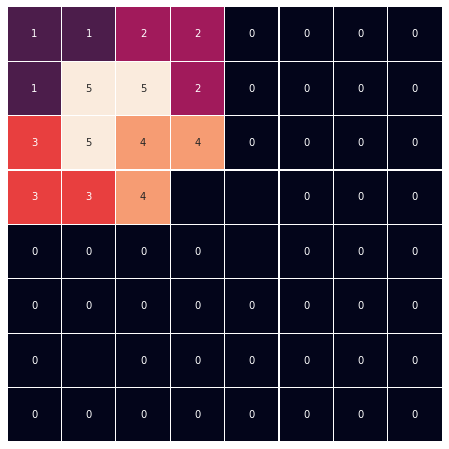

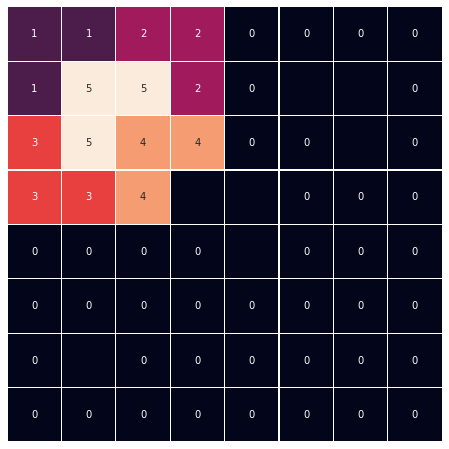

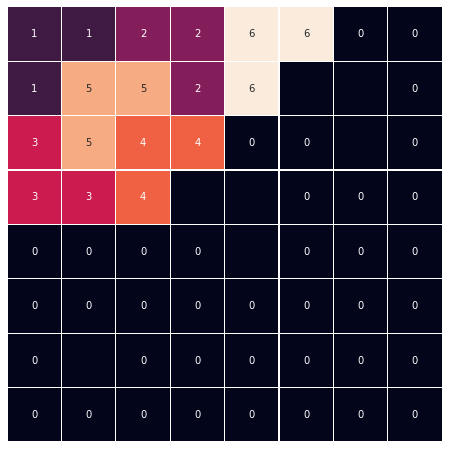

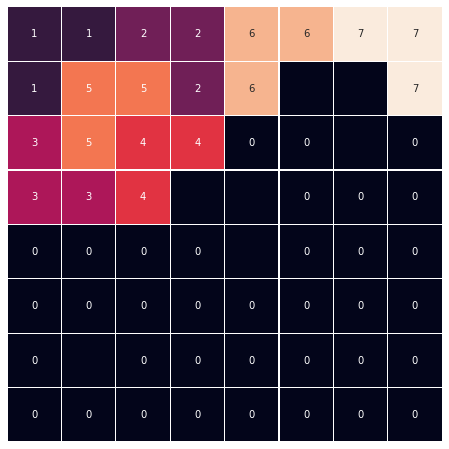

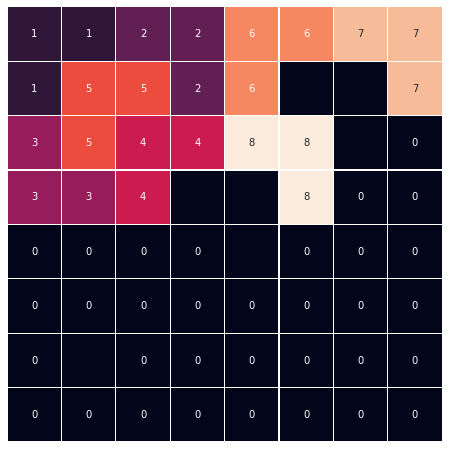

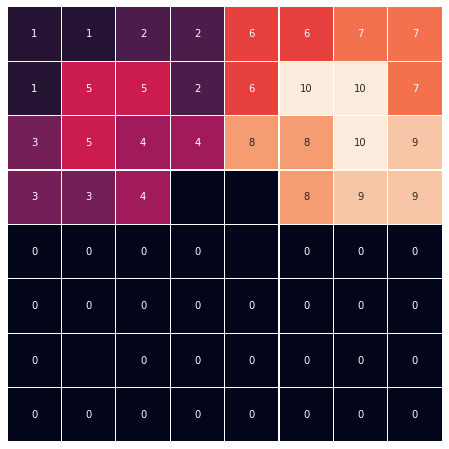

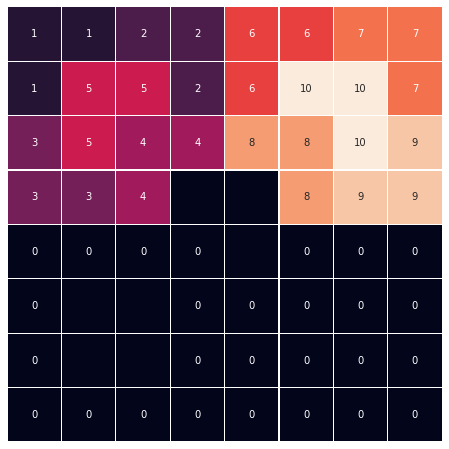

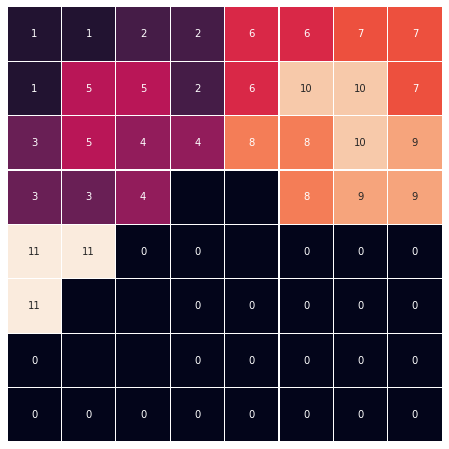

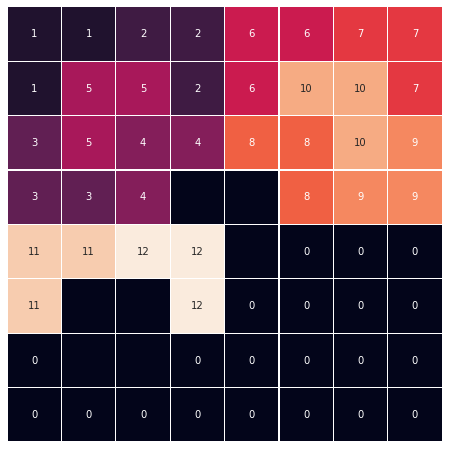

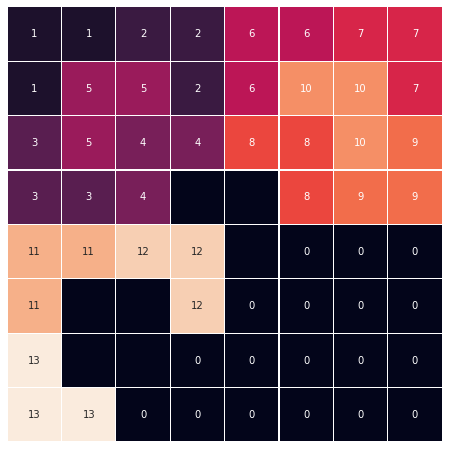

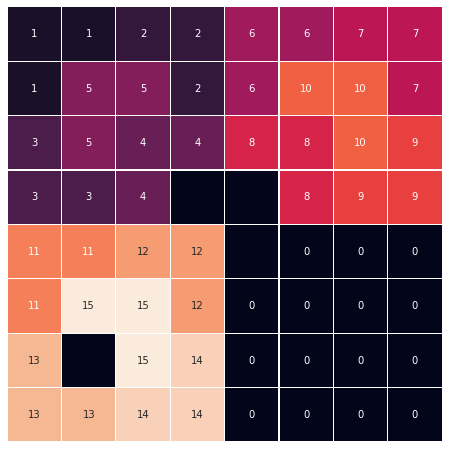

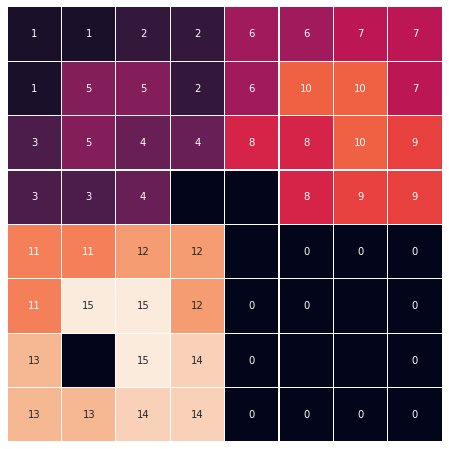

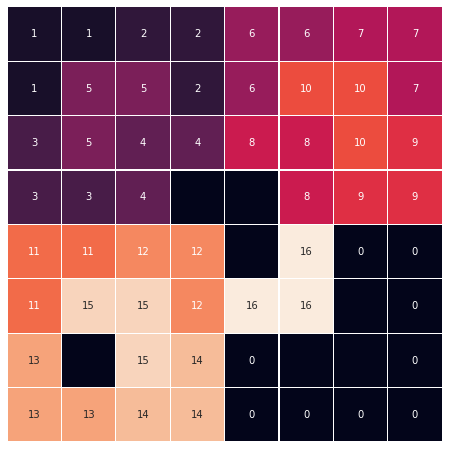

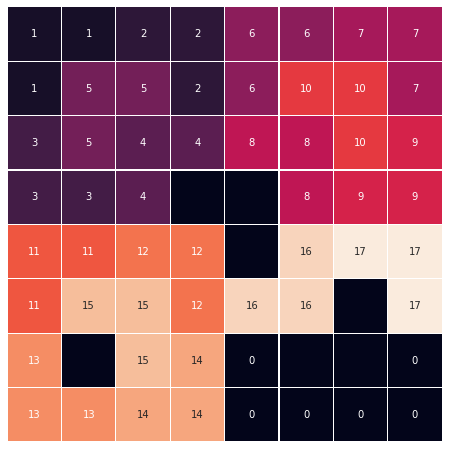

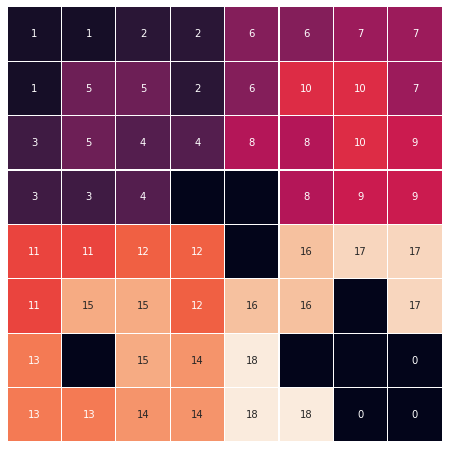

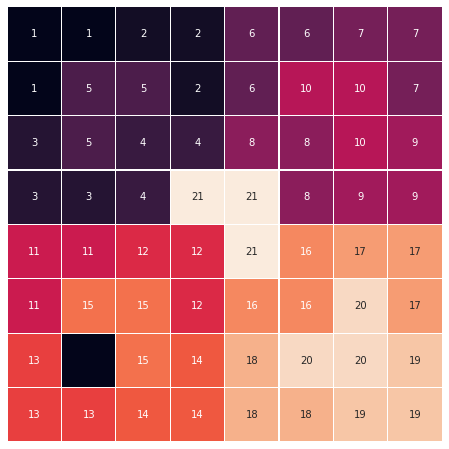

In [ ]:
# Re-init
curr_idx = 0
main(3)